<a href="https://colab.research.google.com/github/arcila-heisman/ml_introductory_labs/blob/master/Lab_1/Lab_1_Parte_2_Funciones_Gausianas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Laboratorio 1 - Parte 2

### Regresión logística y Funciones Discriminantes Gausianas

### 2019 - I

#### Profesor: Julián D. Arias Londoño
#### julian.ariasl@udea.edu.co

Modificado por Heisman Arcila. (Versión original en: https://github.com/jdariasl/ML_IntroductoryCourse/tree/master/Labs)

## Guía del laboratorio

En este archivo va a encontrar tanto celdas de código cómo celdas de texto con las instrucciones para desarrollar el laboratorio.

Lea atentamente las instrucciones entregadas en las celdas de texto correspondientes y proceda con la solución de las preguntas planteadas.

Nota: No olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

In [1]:
from __future__ import division
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Algunas advertencias que queremos evitar
import warnings
warnings.filterwarnings("always")

#### Primer integrante:

Nombre: Hector Mauricio Guerra Londoño

CC: 1017268699

#### Segundo integrante:

Nombre: Juan Camilo Morales Vanegas

CC: 1017238295

## Ejercicio 1: Contextualización del problema

El problema de *clasificación* que están cargados en el archivo `DatosClases.mat`. Las variables o caracterísicas son guardadas en  X y la variable de salida es guardada en la variable Y. 

Responda las siguientes preguntas y grafique los datos usando la funci&oacute;n [scatter](https://matplotlib.org/gallery/shapes_and_collections/scatter.html) de matplotlib y responda las siguientes preguntas

In [15]:
import scipy.io
mat = scipy.io.loadmat('DatosClases.mat')
X = mat['X'] # Matriz X de muestras con las características
Y = mat['Y'] # Variable de salida

1.1 ¿Cu&aacute;ntas clases tiene el problema?:

In [16]:
types = np.unique(Y)
number_of_types = types.size
print('El número de clases que tiene el problema es', number_of_types)

El número de clases que tiene el problema es 2


1.2 ¿Cu&aacute;ntas caracter&iacute;sticas tiene el problema?:

In [17]:
number_of_features = np.size(X, 1)
print('El número de características que tiene el problema son', number_of_features)

El número de características que tiene el problema son 2


1.3 ¿Cu&aacute;ntas muestras tiene el problema?:


In [18]:
number_of_samples = np.size(Y, 0)
print('El número de muestras que tiene el problema son', number_of_samples)

El número de muestras que tiene el problema son 500


1.4 ¿El problema es linealmente separable?:

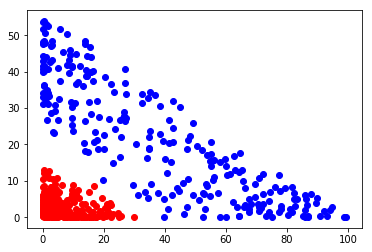

In [19]:
def scatter_data(X, Y):
    whole_data = np.concatenate((X, Y), axis=1)
    class0 = whole_data[np.where(whole_data[:,-1] == 0)]
    class1 = whole_data[np.where(whole_data[:,-1] == 1)]

    plt.scatter(class0[:,0], class0[:,1], c='r')
    plt.scatter(class1[:,0], class1[:,1], c='b')

X_scaled = np.power(X, 2)
scatter_data(X_scaled, Y)

plt.show()

Sí, ya que es posible dejar todas las muestras de una clase a un lado de una recta y las muestras de la otra al otro. En este caso se logra llevando las muestas a otro espacio donde la separación sea evidente.

Gráfica del conjunto de datos

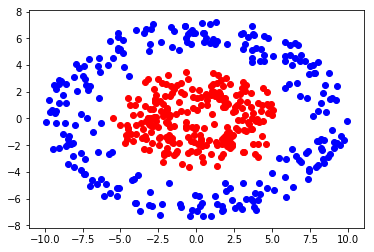

In [20]:
scatter_data(X, Y)
plt.show()

## Ejercicio 2: Completar código

En este laboratorio se va a realizar un procedimiento análogo al laboratorio anterior, pero con el modelo de *regresión logística* que sirve para resolver problemas de clasificación (en principio biclase).

Analice los siguientes métodos a la luz de la teoría vista para el modelo de regresión logística, tales como la función de activación (<font color='blue'>sigmoidal</font>), el modelo de regresión logística (<font color='blue'>logistic_regression</font>), potencia del polinomio y el cálculo del error en clasificación (<font color='blue'>error_logistic</font>) y el gradiente descendente. 

Una vez comprenda su funcionamiento proceda a realizar lo siguiente:

1. Completar el código del método de <font color='blue'>gradiente_descedente_logistic</font> con la regla de actualización de los parámetros para el problema de clasificación

$$w_j(iter) = w_j(iter-1) - \eta \frac{\partial E(w)}{\partial w_j}$$ 

Nota: Para el problema de clasificación tenga presente que si ya implementó la regla de actualización de parámetros para el modelo de regresión polinomial múltiple, este punto es trivial, puesto que sólo tiene que incluir la función sigmoidal tal como lo vimos en la teoría.

2. Graficar el error de clasificación durante las iteraciones del algoritmo. La gráfica debe llevar título y los correspondientes nombres de los ejes.

Nota: Observe que el método logistic_regression ya hace el llamado a la función sigmoidal

In [36]:
#Función de activación Sigmoidal
def sigmoidal(z, graph = False):
    
    '''Complete la siguiente línea con el código para calcular la salida de la función sigmoidal'''
    s = 1 / (1 + np.exp(z * -1))
    
    '''Complete el código para realizar la gráfica de la función aquí'''
    if graph == True:
        plt.plot(z, s, 'r+')
        plt.title('Función sigmoidal')
        plt.show()
    
    return s


#Modelo Regresión logística
def logistic_regression(X, W, graph = False):
    #Con np.dot se realiza el producto matricial. Aquí X (extendida) tiene dim [Nxd] y W es dim [dx1]
    Yest = np.dot(X,W)
    
    Y_lest = sigmoidal(Yest, graph)
    
    #Se asignan los valores a 1 o 0 según el modelo de regresión logística definido
    pos = 0
    for tag in Y_lest:
        
        if tag > 0.5:
            Y_lest[pos] = 1
        elif tag < 0.5:
            Y_lest[pos] = 0
        
        pos += 1
    
    return Y_lest    #Y estimado: Esta variable contiene ya tiene la salida de sigm(f(X,W))


#En este laboratorio solo trabajaremos el caso lineal (grado 1), pero se pueden probar otras fronteras
def potenciaPolinomio(X,grado):
    X2 = X
    
    if grado != 1:
        for i in range(2,grado+1):
            Xadd = X**i
            X2 = np.concatenate((X2, Xadd), axis=1)
    
    return X2


#Calcular el error del modelo de regresión logística
#Si es diferente el Y_estimado con el Y_real cuenta como un error
def error_logistic(Y_lest, Y):
    error = 0
    for ye, y in zip(Y_lest, Y):
        if ye != y:
            error += 1
    
    error = error/np.size(Y)
    
    #print ("La eficiencia en esta iteración fue: "+str(1-error)+'\n')
    
    return error

"""Gradiente descendente para regresión lineal múltiple
X: Matriz de datos extendida.
W: Vector de parámetros del modelo
eta: Taza de aprendizaje
"""
def gradiente_descendente_logistic(X, Y , grado, eta, graph = False, with_error = False):
    
    #Extendemos la matriz
    unos = np.array([np.ones(np.size(X,0))]
                   )
    #Concatenar el vector de unos con la matriz X
    X = np.concatenate((unos.T, X), axis=1)
    X = X.reshape(np.size(X,0),np.size(X,1))
    
    Y = Y.reshape(np.size(Y), 1)
    
    #Tomamos el número de variables del problema
    d = np.size(X,1)

    #Tomamos el número de muestras de la base de datos
    N = np.size(X,0)
    
    #Inicializamos el vector de parámetros aleatoriamente
    #Want = np.random.randn(d)
    W = np.zeros(d)
    W = W.reshape(np.size(W),1)

    eta = eta
    
    iteraciones = 1000
    errores = np.zeros(iteraciones)
    
    for iter in range(iteraciones):

        Y_estimado = logistic_regression(X,W)
        #Error en clasificación
        error = error_logistic(Y_estimado,Y)
        errores[iter] = error

        '''Aquí debe completar el código con la regla de actualización de los parámetros W para regresión
        logística. Tenga en cuenta los nombres de las variables ya creadas: W, X, Y'''
        
        E = np.dot(X.T, (Y_estimado - Y))
        descent = eta/N * E
        W -= descent
        
    
    '''Aquí debe completar el código para realizar la gráfica del error de clasificación vs. iteraciones'''
    
    if graph == True:
        plt.plot(errores, 'b')
        plt.title('Errores vs Iteraciones')
        plt.xlabel('Iteraciones')
        plt.ylabel('Errores')
        plt.show()
        
        print ('Vector de parámetros del modelo:\n')
        print (W)
        print ('\nError de entrenamiento = ' + str(errores[-1]))
    
    if with_error == True:
        return W, errores[-1]
    
    return W

## Ejercicio 3: Entrenamiento

1. Complete el código de la siguiente celda llamando el método <font color='blue'>gradiente_descedente_logistic</font>, se debe pasar los parámetros que corresponde con la tabla de resultados de abajo
2. Ejecute el entrenamiento
3. Llene la tabla de resultados.

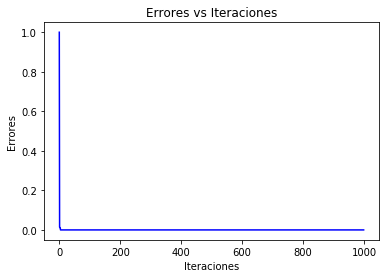

Vector de parámetros del modelo:

[[ 0.03714286]
 [-0.02137267]
 [ 0.02323988]
 [ 0.31396627]
 [ 0.29382284]]

Error de entrenamiento = 0.0


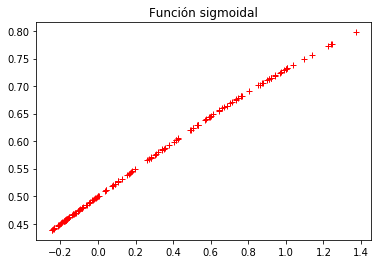


Error durante la prueba = 0.10666666666666667


In [58]:
from numpy import random
import math
import numpy.matlib as matlib
N = np.size(X,0)

# #Se modifica la matriz de datos original de acuerdo al grado del polinomio ingresado para el modelo
grado = 2
X2 = potenciaPolinomio(X,grado)

#Dejamos algunas muestras para el proceso de entrenamiento y otras para evaluar qué tan bueno fue el aprendizaje del modelo
random.seed(1)
ind=np.random.permutation(N)
Xtrain = X2[ind[0:int(math.ceil(0.7*N))],:]
Xtest = X2[ind[int(math.ceil(0.7*N)):N],:]
Ytrain = Y[ind[0:int(math.ceil(0.7*N))]]
Ytest = Y[ind[int(math.ceil(0.7*N)):N]]

#Normalizamos los datos
media = np.mean(Xtrain)
desvia = np.std(Xtrain)
Xtrain = stats.stats.zscore(Xtrain)
Xtest = (Xtest - matlib.repmat(media, Xtest.shape[0], 1))/matlib.repmat(desvia, Xtest.shape[0], 1)

eta = 1

'''Complete la siguiente línea de código llamando el método gradiente_descendente con sus respectivos argumentos'''
W = gradiente_descendente_logistic(Xtrain, Ytrain, grado, eta, True)

#Evaluamos las predicciones del modelo con los datos de test
unos = np.array([np.ones(np.size(Xtest,0))])
Xtest2 = np.concatenate((unos.T, Xtest), axis=1)
Xtest2 = Xtest2.reshape(np.size(Xtest2,0),np.size(Xtest2,1))
Yest = logistic_regression(Xtest2, W, True)
Error = error_logistic(Yest,Ytest)
print('\nError durante la prueba = ' + str(Error))

**Función experimento**

In [59]:
def experiment(X, Y, grado, eta):
    X_powed = potenciaPolinomio(X, grado)
    
    # Split data
    random.seed(1)
    ind = np.random.permutation(N)
    Xtrain = X_powed[ind[0:int(math.ceil(0.7*N))],:]
    Xtest = X_powed[ind[int(math.ceil(0.7*N)):N],:]
    Ytrain = Y[ind[0:int(math.ceil(0.7*N))]]
    Ytest = Y[ind[int(math.ceil(0.7*N)):N]]
    
    # Normalize data
    media = np.mean(Xtrain)
    desvia = np.std(Xtrain)
    Xtrain = stats.stats.zscore(Xtrain)
    Xtest = (Xtest - matlib.repmat(media, Xtest.shape[0], 1))/matlib.repmat(desvia, Xtest.shape[0], 1)
    
    W, error_training = gradiente_descendente_logistic(Xtrain, Ytrain, grado, eta, with_error = True)
    
    unos = np.array([np.ones(np.size(Xtest,0))])
    Xtest2 = np.concatenate((unos.T, Xtest), axis=1)
    Xtest2 = Xtest2.reshape(np.size(Xtest2,0),np.size(Xtest2,1))
    Yest = logistic_regression(Xtest2, W)
    error_test = error_logistic(Yest,Ytest)
    
    return W, error_training, error_test

#### Tabla de resultados

In [60]:
import pandas as pd
import qgrid
randn = np.random.randn

df_types = pd.DataFrame({
    'Tasa de aprendizaje' : pd.Series(['1', '1', '1', '1', '1', '0.1', '0.1', '0.1', '0.1', '0.1', '0.001', '0.001', '0.001', '0.001', '0.001']),
    'Grado del polinomio' : pd.Series([1,2,3,4,5,1,2,3,4,5,1,2,3,4,5])
})
df_types["Error_Entrenamiento"] = ""
df_types["Error_Prueba"] = ""
df_types.set_index(['Tasa de aprendizaje','Grado del polinomio'], inplace=True)
#df_types["Error_Entrenamiento"][2] = "0.0"
#df_types["Error_Prueba"][2] = "0.5"

'''Complete acá el código para llenar la tabla de resultados.'''
i = 0
for eta, grade in df_types.index:
    W, error_training, error_testing = experiment(X, Y, grade, float(eta))
        
    df_types["Error_Entrenamiento"][i] = str(error_training)
    df_types["Error_Prueba"][i] = str(error_testing)
    
    i += 1

#df_types.sort_index(inplace=True)
qgrid_widget = qgrid.show_grid(df_types, show_toolbar = False)

Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.

In [47]:
qgrid_widget.get_changed_df()

Error_Entrenamiento  \
Tasa de aprendizaje Grado del polinomio                       
1                   1                                   0.5   
                    2                                   0.0   
                    3                                   0.0   
                    4                                   0.0   
                    5                                   0.0   
0.1                 1                                   0.5   
                    2                                   0.0   
                    3                                   0.0   
                    4                                   0.0   
                    5                                   0.0   
0.001               1                                   0.5   
                    2                                   0.0   
                    3                                   0.0   
                    4                                   0.0   
                    5                                   0.0   

                                                Error_Prueba  
Tasa de aprendizaje Grado del polinomio                       
1                   1                                    0.5  
                    2                    0.10666666666666667  
                    3                                    0.5  
                    4                                   0.12  
                    5                                    0.5  
0.1                 1                                    0.5  
                    2                    0.10666666666666667  
                    3                                    0.5  
                    4                                   0.12  
                    5                                    0.5  
0.001               1                                    0.5  
                    2                    0.10666666666666667  
                    3                                    0.5  
                    4                                   0.12  
                    5                                    0.5

## Ejercicio 4

4.1 Escriba el modelo $f(\textbf{x},\textbf{w})$, de la mejor frontera de decisión que encontró según la tabla de resultados.

In [61]:
def model(W):
    f = ''
    f = str(W[0])
    cont = 1
    for w in range(1,len(W)):
        f =  f + ' + ' + str(W[w])+ 'X' + str(cont)
        cont = cont +1  
    f = f.replace('[','(')
    f = f.replace(']',')')
    return f

W, error_training, error_test = experiment(X, Y, 2, 1)
print('MODELO: f(X, W) = ' + model(W))

MODELO: f(X, W) = (0.03714286) + (-0.02137267)X1 + (0.02323988)X2 + (0.31396627)X3 + (0.29382284)X4


**Justificación:** Se considera el anterior modelo como el mejor porque es el que representa los _pesos_ que generan menor error.

4.2 Basado en el valor del error obtenido, ¿cu&aacute;ntas muestras de entrenamiento y de prueba clasifica mal el modelo? (un valor para cada conjunto). Nota. Escriba en una celda el código con el cuál obtuvo la respuesta.

In [74]:
errors_in_testing = np.size(Ytest, 0) * error_test
errors_in_training = np.size(Ytrain, 0) * error_training

print('El número de errores obtenidos durante el entranmiento es:', int(errors_in_training))
print('El número de errores obtenidos durante la prueba es:', int(errors_in_testing))

El número de errores obtenidos durante el entranmiento es: 0
El número de errores obtenidos durante la prueba es: 16


## Ejercicio 5

El siguiente código utiliza un clasificador basado en Funciones Discriminantes Gaussianas para resolver el mismo problema de clasificación. Ejecute el código y responda las siguientes preguntas:

In [62]:
def DistribucionGaussiana(X,Mu,Sigma):
    
    SigmaInversa = np.linalg.inv(np.array(Sigma))
    PrimerTermino = (1/(2*math.pi*math.sqrt(np.linalg.det(Sigma))))
    
    primerDot = np.dot((X-Mu),SigmaInversa)
    segundoDot = np.dot(primerDot,(X-Mu).T)
    Exponencial = math.exp(-0.5*segundoDot)
    
    Probabilidad = PrimerTermino * Exponencial
    
    return Probabilidad

def FuncionDiscriminanteG(Xtrain,Ytrain,Xtest,tipo):
    
    N = Xtest.shape[0]
    #Estimación de medias y Covarianzas
    Mu1 = np.mean(Xtrain[(Ytrain==1).flat,:], axis=0)
    Mu2 = np.mean(Xtrain[(Ytrain==0).flat,:], axis=0)
  
    Sigma1 = np.cov((Xtrain[(Ytrain==1).flat,:]).T)
    Sigma2 = np.cov((Xtrain[(Ytrain==0).flat,:]).T)
    
    Sigma3 = (0.5*(Sigma1+Sigma2))
    Yest = np.zeros(N)
    Tipo = tipo
    for i in range(N):
        
            if Tipo == 0 :
                p1 = DistribucionGaussiana(Xtest[i,:],Mu1,Sigma1)
                p2 = DistribucionGaussiana(Xtest[i,:],Mu2,Sigma2)
            elif Tipo == 1:
                p1 = DistribucionGaussiana(Xtest[i,:],Mu1,Sigma3)
                p2 = DistribucionGaussiana(Xtest[i,:],Mu2,Sigma3)
            if p1 >= p2:
                Yest[i] = 1
            else:
                Yest[i] = 0
                
    return Yest

In [63]:
tipo = 0 # Frontera lineal
Yest0 = FuncionDiscriminanteG(Xtrain,Ytrain,Xtest,tipo)
Error = error_logistic(Yest0,Ytest)
print('\nError prueba (Frontera Lineal) = ' + str(Error))


tipo = 1 #Frontera cuadrática
Yest1 = FuncionDiscriminanteG(Xtrain,Ytrain,Xtest,tipo)
Error = error_logistic(Yest1,Ytest)
print('\nError prueba (Frontera cuadrática) = ' + str(Error))


Error prueba (Frontera Lineal) = 0.18

Error prueba (Frontera cuadrática) = 0.08


5.1 ¿Cuál tipo de frontera proporcionó mejores resultados?:


La frontera que prorciona mejores resultados es la cuadrática debido a que tiene menor error.

5.2 Teniendo en cuenta la forma de los datos (De acuerdo con la gráfica hecha en el punto 2), expliqué porqué el modelo de Funciones Discriminantes Gaussianas obtiene un buen resultado:

Como se aprecia en la gráfica de los datos, se puede crear una elipse para separar las dos clases del problema. Por tanto, el mejor modelo es una función Gausiana que es cuadrática y que forma una elipse.